# Gaussina Mixture Model

In this notebook, we practice GMM clustering. For the first examples, we use the famous `faithful` [dataset](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html) of `waiting` time (in minutes) between eruptions and the `duration` (in minutes) of the eruption for the Old Faithful Geyser in Yellowstone National Park, US. The dataset contains 272 rows and 2 columns. Let's take a look at the data.

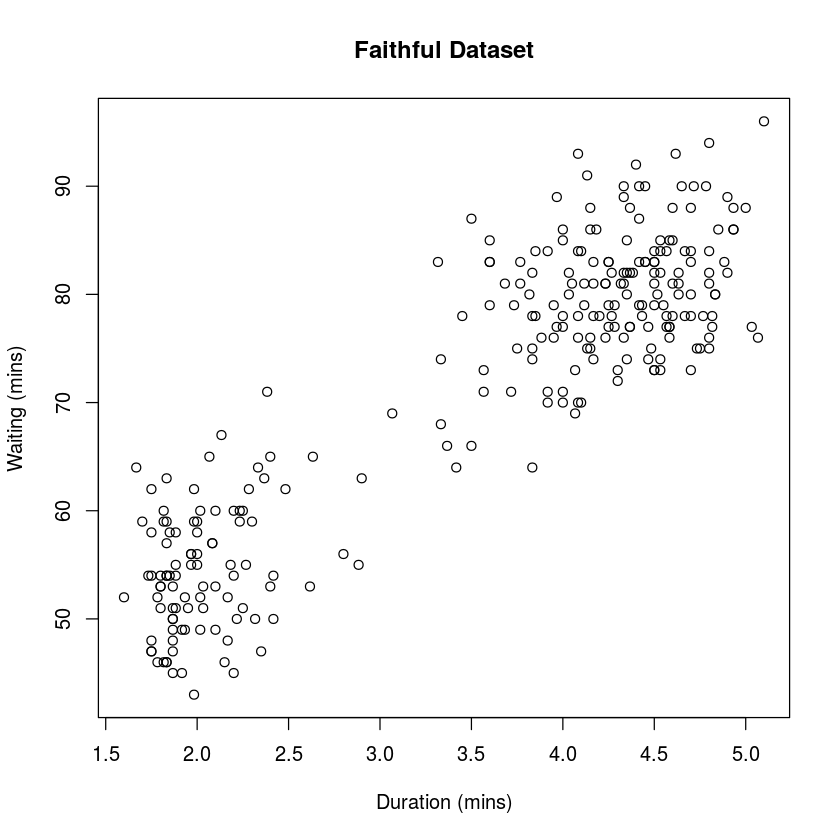

In [1]:
plot(x=faithful$eruptions,
     y=faithful$waiting,
     main='Faithful Dataset',
     xlab = 'Duration (mins)',
     ylab = 'Waiting (mins)')

# Visual Inspection
Since the data has only two variables, it is very easy to visualize and inspect it. In the above figure, we can observe two almost distinct group of data points; one associated with short eruption durations and waiting time, and another scattered in the top right part of the plot showing longer eruption durations and waiting times.

For a closer look, let's also plot the histogram and density estimation of each variable separately.

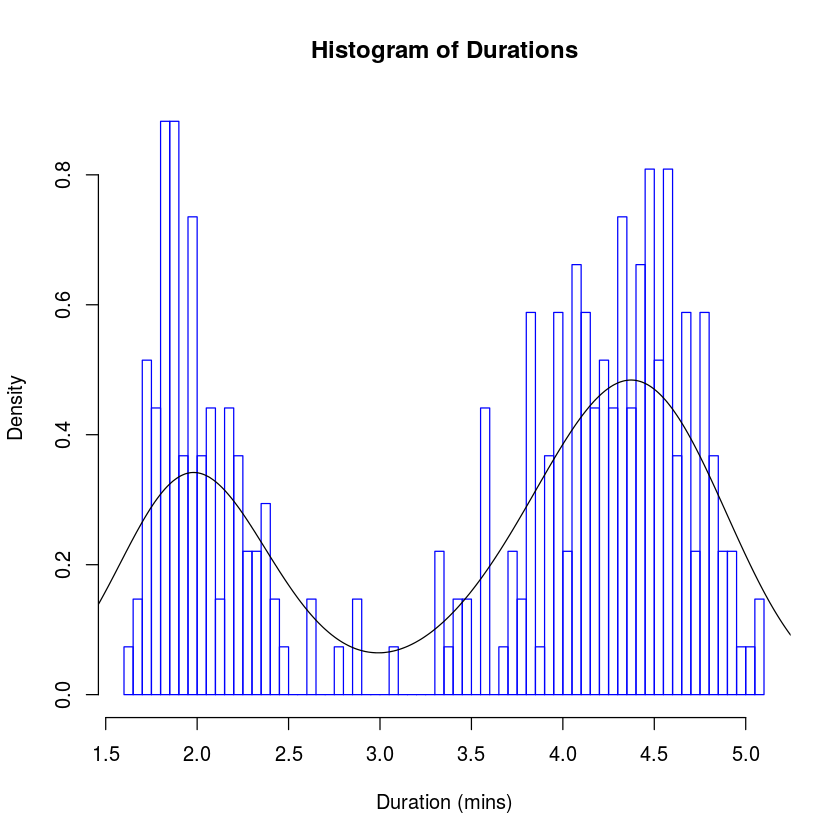

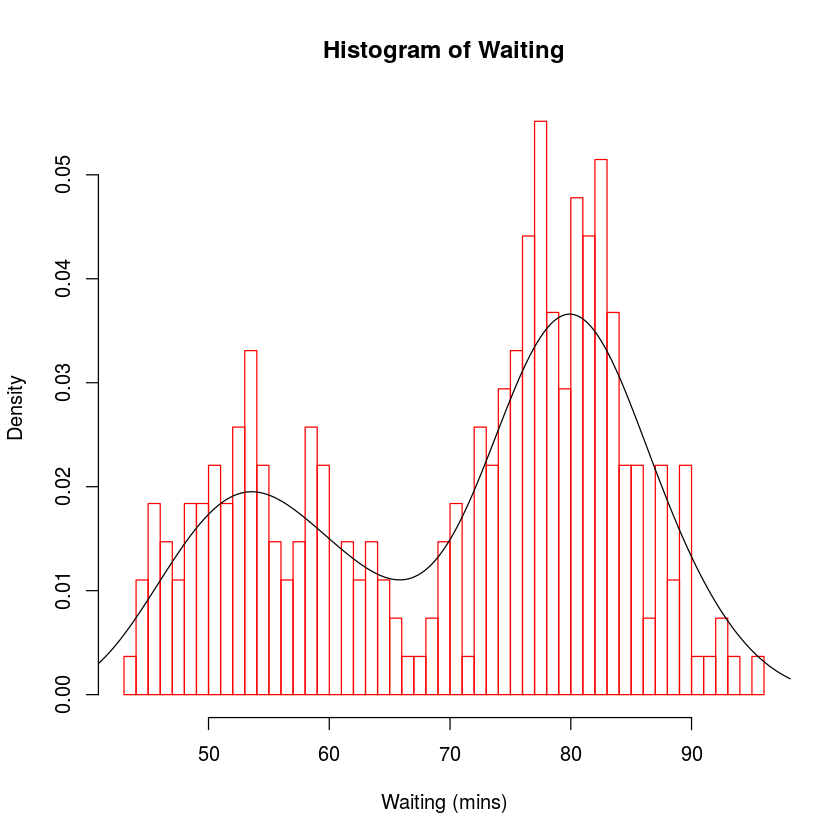

In [2]:
hist(faithful$eruptions, 
     breaks=50, 
     main='Histogram of Durations', 
     xlab='Duration (mins)', 
     probability=TRUE, 
     border='blue')

lines(density(faithful$eruptions))

hist(faithful$waiting, breaks=50, main='Histogram of Waiting', xlab='Waiting (mins)',  probability=TRUE, border='red')
lines(density(faithful$waiting))

As the above histograms show, the dataset consists of two to three clusters with a small overlap. Indeed, it seems each cluster is sampled from a separate Gaussian distribution. Here, we use ` Mclust` function from the `mclust` library to fit a mixture model on the data. 

`Mclust` function can fit a variety of mixture models. To see the available function, call `mclust.options('emModelNames')`:

In [3]:
library(mclust)
mclust.options('emModelNames')

Package 'mclust' version 5.2.3
Type 'citation("mclust")' for citing this R package in publications.


[1] "EII" "VII" "EEI" "VEI" "EVI" "VVI" "EEE" "EVE" "VEE" "VVE" "EEV" "VEV"
[13] "EVV" "VVV"

The following explains the meaning of the model name abbreviations:

* "EII" = spherical, equal volume
* "VII" = spherical, unequal volume
* "EEI" = diagonal, equal volume and shape
* "VEI" = diagonal, varying volume, equal shape
* "EVI" = diagonal, equal volume, varying shape
* "VVI" = diagonal, varying volume and shape
* "EEE" = ellipsoidal, equal volume, shape, and orientation
* "EVE" = ellipsoidal, equal volume and orientation (*)
* "VEE" = ellipsoidal, equal shape and orientation (*)
* "VVE" = ellipsoidal, equal orientation (*)
* "EEV" = ellipsoidal, equal volume and equal shape
* "VEV" = ellipsoidal, equal shape
* "EVV" = ellipsoidal, equal volume (*)
* "VVV" = ellipsoidal, varying volume, shape, and orientation

Let's set the number of culster to $2$ and try the simplest model which is `EEI` where all features of the clusters are similar for all columns. This algorithm forces the model to be circle shape.

In [4]:
EEI2clust <- Mclust(faithful, G=2, modelNames='EEI')
summary(EEI2clust)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEI (diagonal, equal volume and shape) model with 2 components:

 log.likelihood   n df       BIC       ICL
       -1157.68 272  7 -2354.601 -2356.276

Clustering table:
  1   2 
175  97 

Let's take a quick look at the summary of the clusters:
```
----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEI (diagonal, equal volume and shape) model with 2 components:

 log.likelihood   n df       BIC       ICL
       -1157.68 272  7 -2354.601 -2356.276

Clustering table:
  1   2 
175  97
```
The `n` is the number of observations and `df`is the degree of freedom. `BIC` and `ICL` stand for **Bayesian Information Criterion** and **Integrated Complete-data Likelihood**, respectively. Both of these numbers are measures of the goodness of te mixture model. We will use them to select the best mixture model.

Finally, the `Clustering table` shows the number of samples in each cluster. In this example, we have two clusters where the first one has $175$ samples and the second one $97$ observations.

**Note:** Each of the aforementioned values can be accessed via the object model such as `EEI2clust$loglik` and `EEI2clust$df`.

Let's plot the output of `Mclust`.

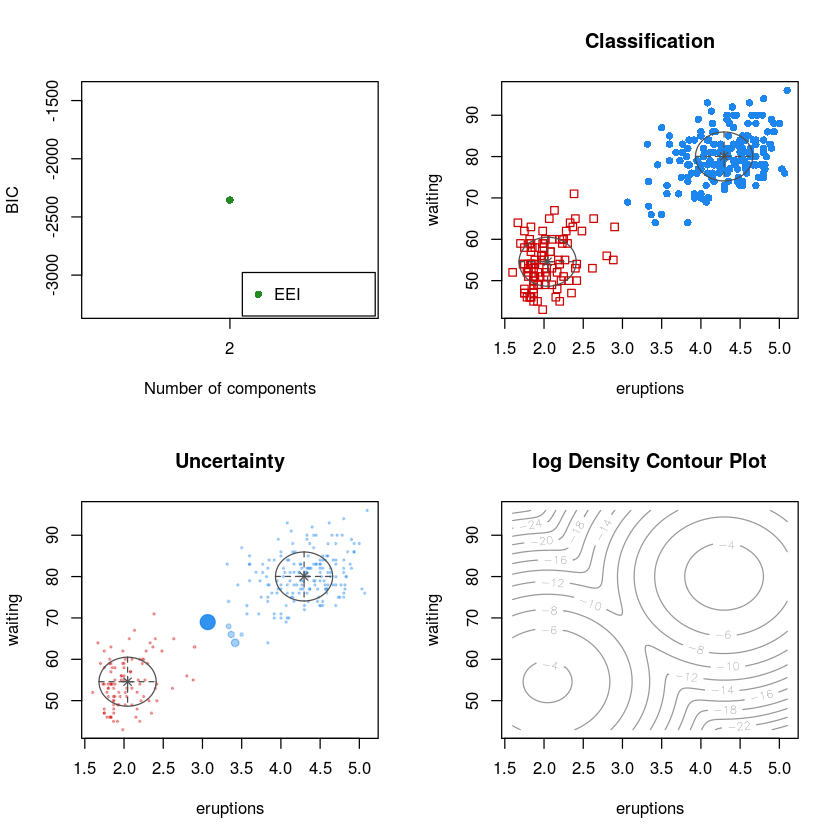

In [5]:
par(mfrow=c(2,2)) # to have a compact figure containing 4 subfigures
plot(EEI2clust)

The `plot` in the above example draws four figures. The first plot compares the BIC metric for different models and numbers of clusters. Since we fixed the model and number of clusters to only one value, there is no more than one datapoint in this plot. We will return to this plot in the next examples.

The **Classification** scatterplot shows the samples, the cluster centers and the shape of the covariance matrices. Samples are colorcoded according to thier closest cluster center. In this example, we forced the covariance matrices to be diagonal. Therefore, the clusters look like a round circle.

The **Uncerntainty** plot is very similar to the Classification plot, except the varying size of the points that indicate the their uncertainty level. The closer an observation is to its cluster center (and at the same time far from the other cluster centers), the more certain we can be that the sample is really come from that distribution. That's why the points far from their cluster centers appear larger.

Note that when the covariance matrices are not diagonal, besides the closeness to the center, the length of the cluster tails also palys a significant role in the membership probability and uncertainty level. Therefore, the distance to the center has a bigger impact in the case of compact models.


The **log Density Contour** plot shows the compactness of each cluster. In fact, the smaller the contours, the more dense a cluster is. In our example, the cluster in the bottom left looks more compact than the other one. You can validate this with the Classification and Uncertainty plots as well.

In the above example, the Classification plot suggests that the clsters (especuially the one at the top right) should be skewed. The Uncertainty plot also suggests that there might be more that two clusters as the classification of the samples in the middle of the plots are very uncertain. Let's try a different setting for our GMM. This time we want to increase the number of clusters and aslo allow them to get any shape.

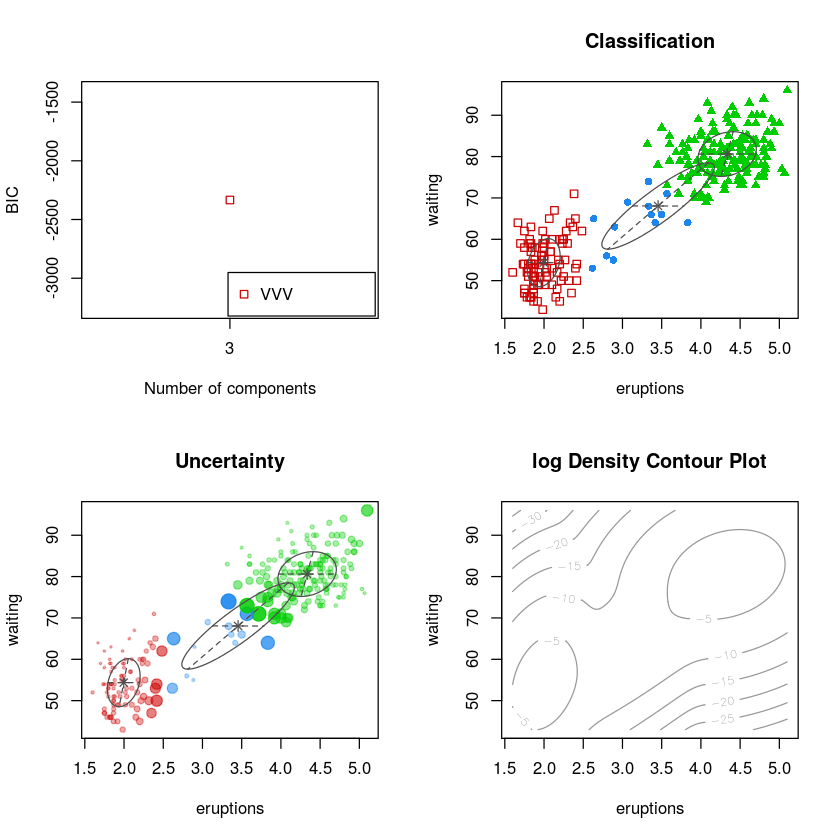

In [6]:
VVV3clust <- Mclust(faithful, G=3, modelNames='VVV')
par(mfrow=c(2,2)) 
plot(VVV3clust)

Now we can see the difference. The number of clustrs are increased and the shape of the clusters are changed. However, we still see a lot of points with large uncertainty valus. Let's try several models at the same time and compare them based on BIC metric.

In [7]:
clusts <- Mclust(faithful, G=c(2:9), modelNames=mclust.options("emModelNames"))
print(clusts)

'Mclust' model object:
 best model: ellipsoidal, equal volume, shape and orientation (EEE) with 3 components


Among $14$ different cluster types and $9$ different numbers of clusters (altogether $14\times9=126$ different settings). `Mclust` suggests that the best mixture model for our data is `EEE` with $3$ clusters. Let's plot the results.

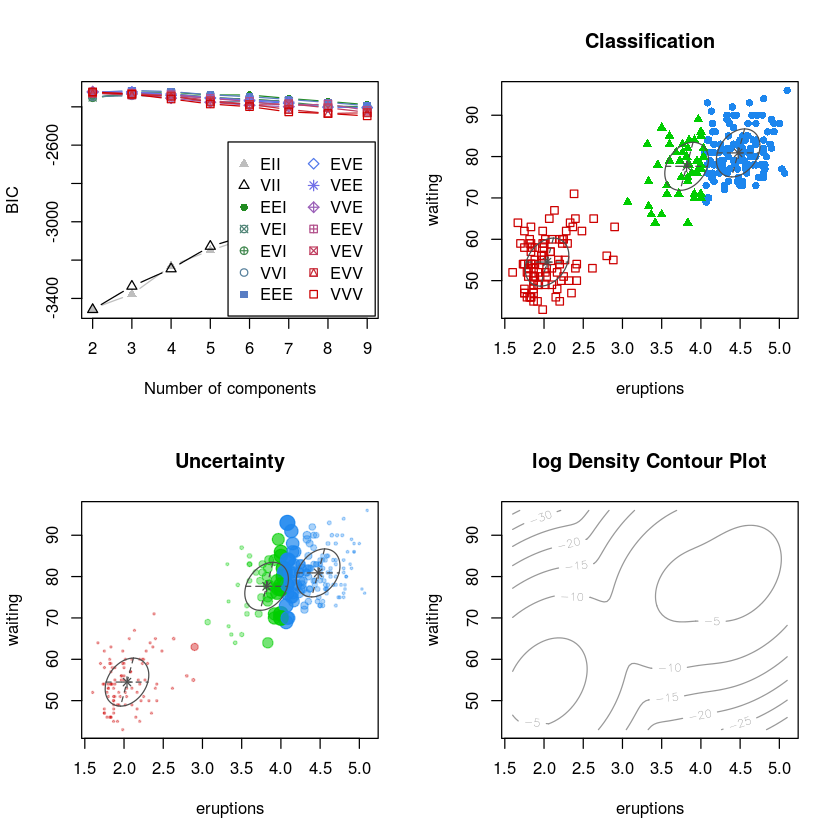

In [8]:
par(mfrow=c(2,2)) 
plot(clusts)